# SPRINT 8

Antes de empezar a desarrollar las graficas, establecemos una conexion con la base de datos atraves de una función en python logramos extraer de forma innata las tablas y datos según el orden de origen, el mismo codigo provee el cierre de conexión para segurar el consumo adicional de recursos. En el Desarrollo de este sprint, cuando usemos datos de otra base de datos siempre usaremos este script para su extración

In [1]:
########################################### FASE 1 ############################################ 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mysql.connector
db = mysql.connector.connect(host='xxxxxx',
                            port='xxxx',
                            database='xxxxxxx',  
                            user='root',
                            password='xxxxxx')

def load_table_to_dataframe(db, cursor, table_name):             # Cargo c/tabla en un Pandas DataFrame.                                                     
    try:
        df = pd.DataFrame()                                      # Creo un DataFrame vacío para la tabla
        cursor.execute(f"SELECT * FROM {table_name}")            # Ejecuto la consulta para extraer tablas
        column_names = [col[0] for col in cursor.description]    # Obtengo los nombres de las columnas
        data = cursor.fetchall()
        data_list = []                                           # Convierto los datos a un formato Dataframe
        for row in data:
            data_list.append(list(row))
        df = pd.DataFrame(data_list, columns=column_names)       # Creo el DataFrame (datos y nombres de columnas)
        return df
    except Exception as e:
        print(f"Error loading table '{table_name}':", e)
        return None

cursor = db.cursor()
cursor.execute("SHOW TABLES")
tables = [tabla[0] for tabla in cursor.fetchall()]
print('-'*55)
print('           >>>> DATAFRAMES ENCONTRADOS <<<<')
print('-'*55)

for table_name in tables:
    df_name = f"df_{table_name.lower()}"  # Convierto el nombre de la tabla a minúsculas con prefijo 'df_'
    df = load_table_to_dataframe(db, cursor, table_name)
    if df is None:
        continue

    globals()[df_name] = df  # Creo una variable global con el nombre dinámico y configuro en el DataFrame
    print(f"DataFrame: {df_name}")  # Imprimo el nombre del DataFrame
    
cursor.close()  # Desconexión
db.close()

-------------------------------------------------------
           >>>> DATAFRAMES ENCONTRADOS <<<<
-------------------------------------------------------
DataFrame: df_card_status
DataFrame: df_companies
DataFrame: df_credit_cards
DataFrame: df_products
DataFrame: df_transactions
DataFrame: df_transactions_products
DataFrame: df_transactions_products_b
DataFrame: df_users
DataFrame: df_vista1


In [6]:
a = pd.merge(df_transactions, df_transactions_products, left_on='id', right_on='id', how='inner')
b = pd.merge(a, df_products, left_on='product_ids_y', right_on='id', how='inner')

lista=b[['amount','price']]
lista_ordenada = lista.sort_values(by='amount', ascending=False)
lista_ordenada.plot()

TypeError: no numeric data to plot

# Nivel 1
## ejercicio 1
### Una variable numérica.

1. Creación del histograma:
Se utiliza la función sns.histplot para crear un histograma de la variable amount extraída del DataFrame df_transactions.
La opción kde=True indica que se superponga una curva de densidad de kernel al histograma.

2. Configuración del tema de Seaborn:
Se llama a la función sns.set_theme para establecer el tamaño de la figura (figure.figsize) a 7 pulgadas de ancho y 5 pulgadas de alto.
Esto ajusta el tamaño del lienzo donde se visualizará el histograma.

3. Personalización de las etiquetas y el título:
Se utiliza la función plt.xticks para rotar las etiquetas del eje X en 75 grados y ajustar el tamaño de la fuente a 8 puntos.
Se utiliza la función plt.title para establecer el título del gráfico como "Distribución de Montos por Transacción".
Se utilizan las funciones plt.xlabel y plt.ylabel para etiquetar los ejes X e Y como "Monto de la Transacción" y "Cantidad de Transacciones", respectivamente.

4. Ajustes finales y visualización:
Se llama a la función plt.tight_layout para ajustar automáticamente el espacio entre el gráfico y los bordes de la figura.
Se llama a la función plt.show() para mostrar el histograma creado.
En resumen:

Este código crea un histograma con KDE de la variable amount en df_transactions, personaliza el tema de Seaborn, ajusta las etiquetas y el título del gráfico, y muestra el resultado final.

INTERPRETACION:

En terminos generales, la grafica muestra una media en monto de las transacciones de aproximadamente de 250 euros.
La distribución parece ser unimodal de la cual se observa 1 picos en las transacciones de 400-450, lo que significa que existe baja variabilidad, si bien el resto de transacciones se presentan casi uniforme en el despalzamiento del grafico, no podemos desestimar algunos rangos que destacan con leve frecuencia en los intervalos de 100 a 200 euros y de 350-400 a 450-500 euros.

entre 58 y 70 transacciones.
A diferencias de los rangos tienen menos de 60 registros, como indica el de 200-250 euros evidenciandose con una menor frecuencia de 53 transacciones.

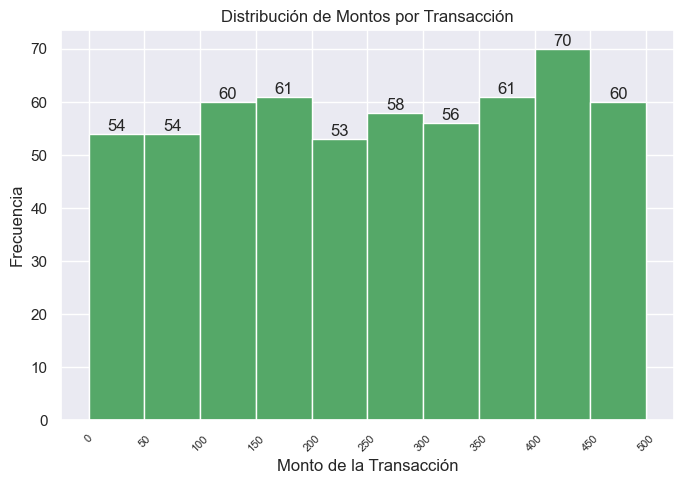

In [53]:
plt.hist(df_transactions['amount'], bins=np.arange(0, 525, 50), color='g')

plt.xticks(rotation=45, fontsize=8)
plt.title("Distribución de Montos por Transacción")
plt.xlabel("Monto de la Transacción")
plt.ylabel("Frecuencia")
plt.xticks(bins)
plt.bar_label(container=bars)
plt.tight_layout()
plt.show()

## Ejercicio 2
### Dos variables numéricas.

Este código analiza la relación entre el monto de las transacciones y el precio total de los productos comprados. Aquí te explico paso a paso lo que hace:

- FUSION
Primero, se fusionan dos tablas: df_transactions y df_transactions_products
usando en la columna id en ambas tablas.
Luego, el resultado de la primera fusión se vuelve a fusionar con la tabla df_products.
por medio de la columna product_ids_y en la tabla resultado (a) y la columna id en df_products.

- CALCULO POR GRUPO
Se agrupa el resultado de la segunda fusión (b) por la columna amount (monto de la transacción).
Dentro de cada grupo, se calcula la suma de la columna peso.
El resultado tiene como índice los valores de amount y como valores la suma total del peso de los productos para cada monto de transacción.

- DIAGRAMA
Se crea un diagrama de dispersión utilizando plt.scatter.
En el eje x se representan los valores del índice de df (los montos de transacción).
En el eje y se representan los valores de la serie df (la suma total del peso por monto).
Se rotan las etiquetas del eje x para mejorar la visualización.
Se etiquetan los ejes como "Montos" y "Peso".
Finalmente, se muestra el gráfico.

INTERPRETACION
En la grafica se observan que posublemente no existe una relacion entre las variables.
Lo que podemos ver es que los usuarios del universo de esta base de datos han optado por productos entre 100-400, es posible que el universo de la data no se lo suficientemente amplio para incrementar los aspectos granulares de la muestra, pero por lo pronto esa es la percepción de la data 

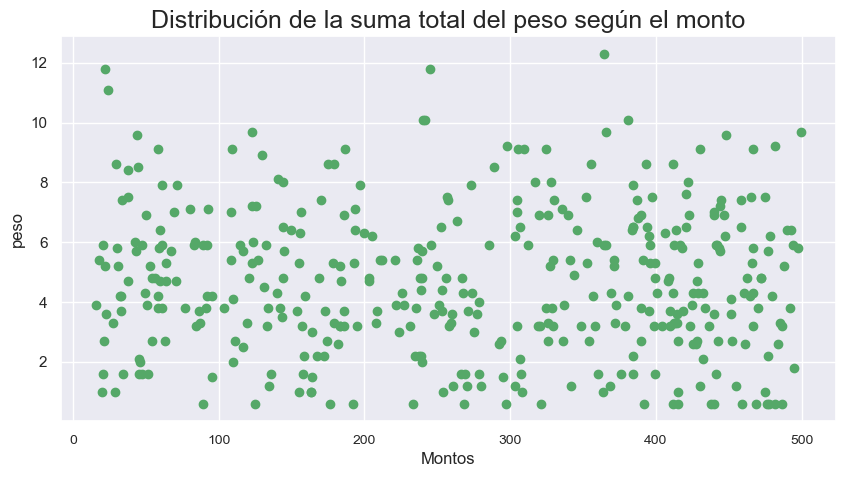

In [50]:
a = pd.merge(df_transactions, df_transactions_products, left_on='id', right_on='id', how='inner')
b = pd.merge(a, df_products, left_on='product_ids_y', right_on='id', how='inner')

df = b.groupby('amount')['weight'].sum()

plt.scatter(x=df.index, y=df.values, color='g')
plt.xticks(rotation=0, fontsize=10)
plt.title('Distribución de la suma total del peso según el monto', fontsize=18)
plt.xlabel('Montos')
plt.ylabel('peso')
plt.show()

## Ejercicio 3
### Una variable categórica.

Este código de Python utiliza librerías que se importaron al inicio del sprint y se guardan en memoria como pandas, seaborn entre otras para analizar y visualizar datos de los DataFrames necesarios respectivamente.

Extrae la columna country del DataFrame df_companies.
Utiliza el método value_counts() para contar la frecuencia de aparición de cada país (valor único) en la columna.
Ordena el resultado de mayor a menor con .head(10) para obtener los 10 países con más empresas.
Almacena este conteo en un nuevo DataFrame llamado country_counts.

GRAFICO:
Utiliza seaborn.barplot para generar un gráfico de barras.
Define el eje x (x) con los índices del DataFrame country_counts (nombres de los países).
Define el eje y (y) con los valores del DataFrame country_counts (número de empresas por país).
Configura y muestra el gráfico:

CONFIGURACION:
Ajusta el tamaño de la figura con sns.set_theme(rc={'figure.figsize':(6, 4)}).
Agrega etiquetas para los ejes x (plt.xlabel('Country')) y en el eje y (plt.ylabel('Number of Companies')).
Establece un título para el gráfico (plt.title('Los 10 paises con mayor numero de compañias')).
Rota las etiquetas del eje x para mejor visualización (plt.xticks(rotation=45, fontsize=10)).
Ajusta el espacio entre elementos del gráfico con plt.tight_layout().
Muestra el gráfico con plt.show().

INTERPRETACION
El gráfico permite visualizar fácilmente la distribución de las empresas por país.
En este grafico se muestra a los 10 países con mayor número de compañías registradas dirigidos al lado izquierdo, represetando por paises nórdicos y anglo. 

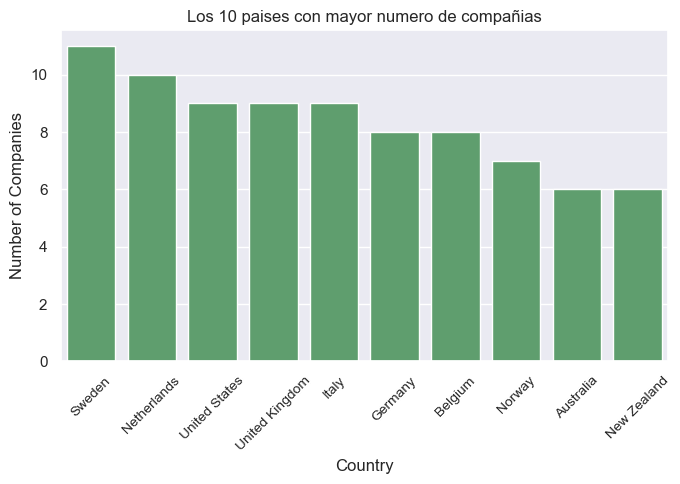

In [17]:
country_counts = df_companies['country'].value_counts().head(10)

sns.barplot(x=country_counts.index, y=country_counts.values, color='g')

sns.set_theme(rc={'figure.figsize':(6, 4)})  
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.title('Los 10 paises con mayor numero de compañias')
plt.xticks(rotation=45, fontsize=10)  
plt.tight_layout()
plt.show()

# - Ejercicio 4
### Una variable categórica y una numérica.

Este código de Python utiliza librerías que se importaron al inicio del sprint y se guardan en memoria como pandas, seaborn entre otras para analizar y visualizar datos de los DataFrames necesarios respectivamente.

Este código analiza transacciones agrupadas por país para entender la distribución de montos:

UNION DATAFRAMES:
Fusiona dos DataFrames (df_transactions y df_companies) en uno nuevo llamado df. La combinación se realiza utilizando la columna business_id de df_transactions y la columna company_id de df_companies, y solo se conservan las filas donde ambos identificadores coinciden (inner join).

Ademas, calculamos montos por país, agrupamos el DataFrame combinado df por la columna country. Luego, para cada grupo (país), calcula la suma de la columna amount. El resultado se almacena en una nueva serie montos_pais, donde el índice representa el país y los valores son los montos totales por país.

Ordenar montos: Ordena la serie montos_pais en orden descendente con (ascending=False) según los montos totales. De esta forma, los países con mayor suma de montos aparecerán primero.

GRAFICO Y CONFIGURACION:
Crea un diagrama de barras utilizando la librería seaborn. El eje x representa los países (obtenidos del índice de montos_pais) y el eje y representa los montos totales por país (valores de montos_pais).
Se configura el tamaño de la figura, las etiquetas de los ejes, el título del gráfico, la rotación y tamaño de las etiquetas del eje x, y ajusta el espacio entre elementos del gráfico para una mejor visualización.
Mostramos el diagrama de barras creado con sns.barplot.

RESUMEN:
Este código proporciona una visión general de la distribución de montos de transacciones agrupados por país. El diagrama de barras permite identificar fácilmente qué países tienen los montos totales más altos en el conjunto de datos analizado.

INTERPRETACION
En este grafico se denota que hay 2 países (Germany, United Kingdom) que lideran transacciones sueriores a 25000, 6 países (Germany, United Kingdom, Sweden, Norway, Ireland, Canada) superan los 15000, en resumen el patron indica que hay mas de la mitad de paises que no superan los 5000, a excepción Canada que ha pasado con las justas.

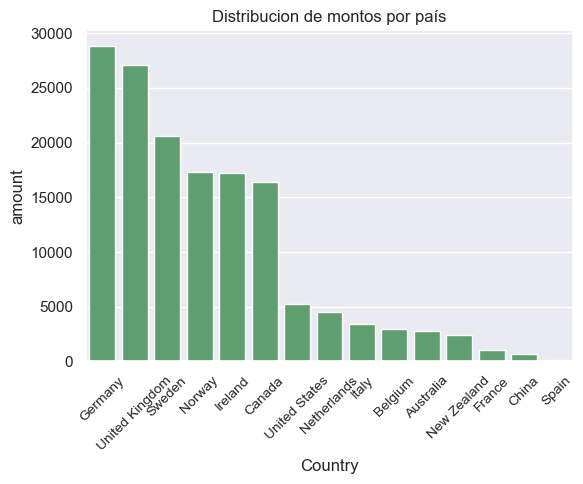

In [37]:
df = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id', how='inner')
montos_pais = df.groupby('country')['amount'].sum()
montos_pais = montos_pais.sort_values(ascending=False)

sns.barplot(x=montos_pais.index, y=montos_pais, color='g')

sns.set_theme(rc={'figure.figsize':(6, 5)})  
plt.xlabel('Country')
plt.ylabel('amount')
plt.title('Distribucion de montos por país')
plt.xticks(rotation=45, fontsize=10)  
plt.tight_layout()
plt.show()


# - Ejercicio 5
### Dos variables categóricas.

Este código de Python utiliza librerías que se importaron al inicio del sprint y se guardan en memoria como pandas, seaborn entre otras para analizar y visualizar datos de los DataFrames necesarios respectivamente. 

- FUSIONAMOS TABLAS
Primero, fusiona la tabla df_transactions con df_companies por la columna business_id en df_transactions y la columna company_id en la subtabla de df_companies.
Esto permite asociar cada transacción con el país de la compañía involucrada.

- CALCULO SUMA POR GRUPO
Agrupamos el resultado de la fusión (a) por la columna country (país).
Dentro de cada grupo se calcula la suma de la columna declined (transacciones declinadas).
El resultado es una serie (df) que tiene como índice los distintos países y como valores la suma total de transacciones declinadas en cada país.

- CREAR GRAFICO:
Se configura el tamaño del gráfico con plt.figure(figsize=(8, 4)).
Se utiliza el método plot(kind='bar') de la serie (df) para generar un gráfico de barras.
Se asigna la lista meta_colores al argumento color para colorear las barras según el criterio definido anteriormente.
Se rotan las etiquetas del eje x para mejorar la visualización.
Se añaden títulos y etiquetas a los ejes.
Se agrega una línea horizontal auxiliar en el valor 3 del eje y con estilo de línea continua (axhline).
Finalmente, se muestra el gráfico con plt.show().

- INTERPRETACION
En este gráfico evidencia claramente las transacciones declinadas agrupadas por cada país, se ponen a prueba al no cumplir con la meta establecida en un indice de 3 (transaciones declinadas), aparentemente la mayoria de paises descritos en el grafico no cumplen con las condición impuesta: Australia, Belgica, Canada, Alemania, Irlanda, Italia, Paises Bajos, New Zelanda, Noruega, Siecia, Reino Unido y Estados Unidos.
Po otro lado, los paises que no sobrepasan el limite de 3 transaciones declinadas, osea cumplen con el objetivo corporativo de alcanzar un mínino de declinaciones, son: Canadá, China y España, lo evidencia como resultado de la configuracion de colores usando en la linea continua que representa la meta establecida reflejada en el gráfico.

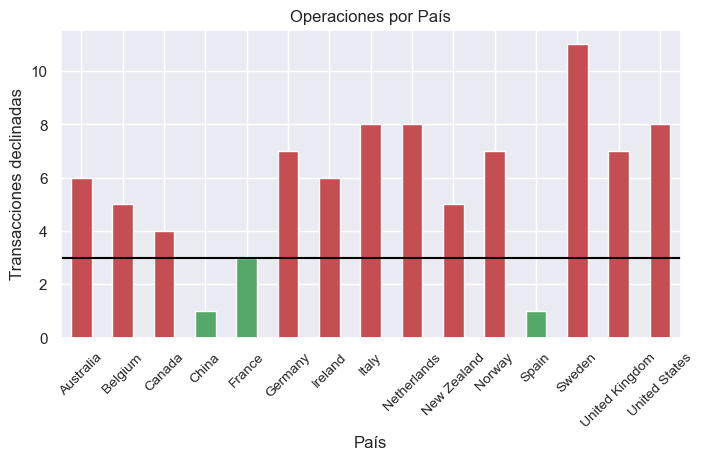

In [44]:
a = df_transactions.merge(df_companies[['company_id', 'country']], left_on='business_id', right_on='company_id')
df = a.groupby('country')['declined'].sum()

meta_colores = ['r' if valor > 3 else 'g' for valor in df]

plt.figure(figsize=(8, 4))
df.plot(kind='bar', color=meta_colores)
plt.xticks(rotation=45, fontsize=10)  
plt.title('Operaciones por País')
plt.ylabel('Transacciones declinadas')
plt.xlabel('País')
plt.axhline(y=3, color='black', linestyle='-')  
plt.show()

# - Ejercicio 6
### Tres variables.

INTERPRETACION
Se pone a prueba la produccion de las compañias que residen en los siguiente paises (grafico) estableciendo un mínimo y un máximo en transacciones.
En este grafico Alemania y Reuno Unido lideran el mercado sobrepasando el máximo de transactiones (80 operaciones) como meta mas ambiciosa en productividad comercial.
Conforme lo establecido como meta minima en transacciones (20 operaciones), en los siguientes paises, a pesar de no liderar el mercado superaron la meta establecica para acceder a financiamiento de la UE-FMI: Canada, Irlanda, Noruega, Suecia. 
Estos últimos mencionados, si observamos la relación de sus transacciones y su indice de operaciones declinadas es muy bajo a diferencia de los demas países que tienen un indice de declinaciones de aproximadamente de un 40%.
El país con la proyección mas baja y un alto indice de operaciones declinadas es España

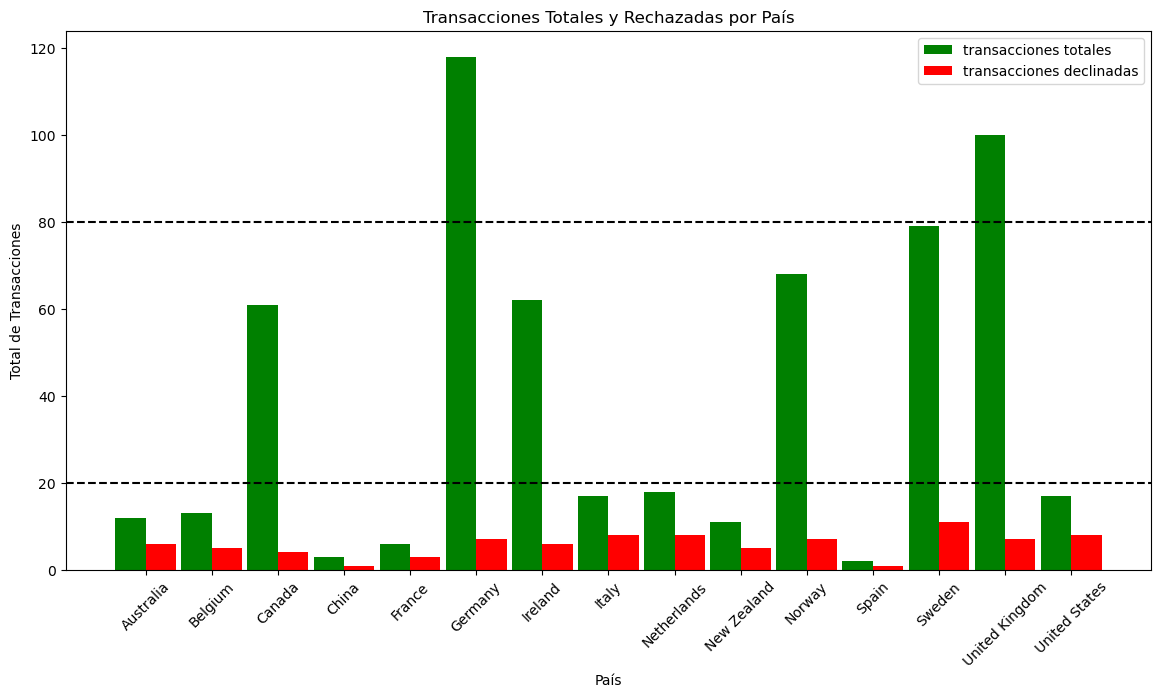

In [14]:
df = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id', how='inner')

MontosPais = df.groupby('country')['id'].count()
DeclinadosPais = df.groupby('country')['declined'].sum()

labels = MontosPais.index
ttotales = MontosPais.values
tdeclinadas = DeclinadosPais.values
bar_width = 0.46

x = np.arange(len(labels))
plt.figure(figsize=(14, 7))
plt.bar(x - bar_width/2, ttotales, width=bar_width, label='transacciones totales', color='g')
plt.bar(x + bar_width/2, tdeclinadas, width=bar_width, label='transacciones declinadas', color='r')
plt.xlabel('País')
plt.ylabel('Total de Transacciones')
plt.title('Transacciones Totales y Rechazadas por País')
plt.axhline(y=80, color='black', linestyle='--')  
plt.axhline(y=20, color='black', linestyle='--')  
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.show()

# - Ejercicio 7
### Graficar un Pairplot.

Este código continúa con el analisis en relación entre las variables: precio / peso
Peso del producto (weight)
Precio del producto (price)

FUSION DE TABLAS:
- Se fusionan dos tablas: df_transactions y df_transactions_products
- Se fusionan por la columna id en ambas tablas.
- El tipo de fusión es inner, lo que significa que solo se conservan las filas que tienen un valor coincidente de id en ambas tablas.
- El resultado de la primera fusión se vuelve a fusionar con la tabla df_products.
- Se fusionan la tabla (a) con la tabla df_product, se usa la fusión inner.

DIAGRAMA
- Se utiliza la librería seaborn para crear un diagrama de dispersión con pares (sns.pairplot).
- Se selecciona el DataFrame resultado de las fusiones (b) como entrada.
- Se especifican las variables a analizar: weight y price.
- Se configura el tipo de gráfico para la diagonal (diag_kind) como kde (estimación de densidad kernel). Esto muestra la distribución de cada variable en la diagonal.
- Se configura el tipo de gráfico para los pares de variables (kind) como reg (regresión lineal). Esto muestra la relación entre las variables con una línea de tendencia.
- Se agrega un matiz de color (hue) basado en la variable declined. Esto permite ver si la relación entre peso y precio difiere según si la transacción fue declinada o no.
- Se utiliza plt.show() para mostrar el gráfico generado por sns.pairplot.

INTERPRETACION
En continuación al analisis del ejercicio 2, ponemos en palestra las variables precio y peso
Los pesos denotan una distribución baja y muy monotona en referencia a las transacciones declinadas, en cambio en transacciones no declinadas se amplia la variedad y se eleva sin dejar de existir 2 seudopicos relevantes.
en la interpretacion de las variables, el peso tiene una distribución bimodal, se reflejan 2 seudopicos, mas notoria en las transacciones no declinadas. Las distribuciones del precio muestra una distribución tambien bimodal, con 2 picos menos pronunciados como transacciones no declinadas pero de mayor magnitud a las transaccioens declinadas. 
Se muestra una cierta debilidad ascendente en la correlación entre las variables precio y peso, osea que mientras incrementa su peso, ya sea por su tamaño o densidad, el precio se ve afectado levemente, por ahora no es estan determinante pero si observable.

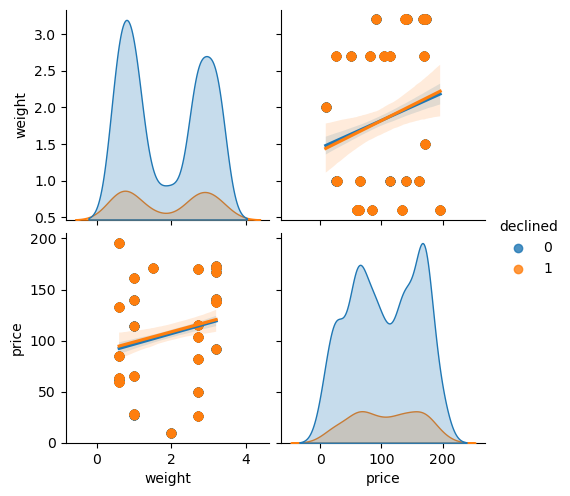

"plt.style.use('ggplot')\nsns.pairplot(df_products, vars=['price', 'weight'],diag_kind = 'kde', kind='reg')\nplt.show()"

In [11]:
df_products['price'] = df_products['price'].replace('[\$,]', '', regex=True).astype(float)
df_products['price'] = df_products['price'].astype(float)

a = pd.merge(df_transactions, df_transactions_products, left_on='id', right_on='id', how='inner')
b = pd.merge(a, df_products, left_on='product_ids_y', right_on='id', how='inner')

sns.pairplot(b, vars=['weight', 'price'],diag_kind = 'kde', kind='reg', hue='declined')
plt.show()


# NIVEL 2
## EJERCICIO 1
### Correlación de todas las variables numéricas.

Este código aprovecha los datos de memoria en cuanto a importacion de bibliotecas, extracción de datos de df_iris y formula los siguientes pasos posteriores:

El código explora las relaciones entre las características del conjunto de datos de df_iris mediante visualización y análisis de correlación.

MATRIX DE CORRELACION:
- correlation_matrix = df_iris.corr(): Esta línea calcula los coeficientes de correlación entre todos los pares de características en el DataFrame df_iris. La correlación mide cuánto cambian dos variables juntas. Varía de -1 (correlación perfectamente negativa) a 1 (correlación perfectamente positiva) y 0 indica que no hay relación lineal.
- El código imprime la matriz de correlación calculada en la consola. Esta matriz muestra el coeficiente de correlación entre cada característica (columna) y todas las demás características (fila).

MAPAS DE CALOR:
- sns.heatmap(df_iris.corr(), annot=True): Esta línea crea una visualización de mapa de calor de la matriz de correlación utilizando la seabornbiblioteca. Los mapas de calor utilizan la intensidad del color para representar los valores de correlación: el rojo indica correlación positiva, el azul indica correlación negativa y el blanco indica ausencia de correlación.
- annot=True este argumento muestra los coeficientes de correlación reales dentro de cada celda del mapa de calor para una mejor interpretación.

RESUMEN:
Este fragmento de código proporciona un análisis completo de las relaciones entre las características del conjunto de datos de df_iris. Calculando los coeficientes de correlación, los imprime para una inspección detallada y los visualiza utilizando un mapa de calor codificado por colores. Este análisis ayuda a identificar características que están altamente correlacionadas o son independientes, lo que puede ser valioso para tareas como la selección de características en modelos de aprendizaje automático

INTERPRETACION
Podemos ver una correlacion dominante entre Petal length y petal width, esta correlación entre estas dos variables es positiva y muy fuerte (aproximadamente 0,96). Esto significa que las dos variables están muy estrechamente relacionadas y tienden a aumentar o disminuir juntas.
Ademas, podemos ver que Sepal length y petal length: La correlación entre estas dos variables es positiva y fuerte (aproximadamente 0,87). Esto significa que las dos variables están estrechamente relacionadas y tienden a aumentar o disminuir juntas.
Sepal length y petal width: La correlación entre estas dos variables es positiva y algo fuerte (aproximadamente 0,82). Esto significa que las dos variables están estrechamente relacionadas y tienden a aumentar o disminuir juntas.
las demas corelaciones son debiles de las cuales  no superan los 40 puntos

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000



C:\Users\SINERGIA\AppData\Local\Temp\ipykernel_3936\647576285.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_iris.corr()
C:\Users\SINERGIA\AppData\Local\Temp\ipykernel_3936\647576285.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_iris.corr(), annot=True)


<Axes: >

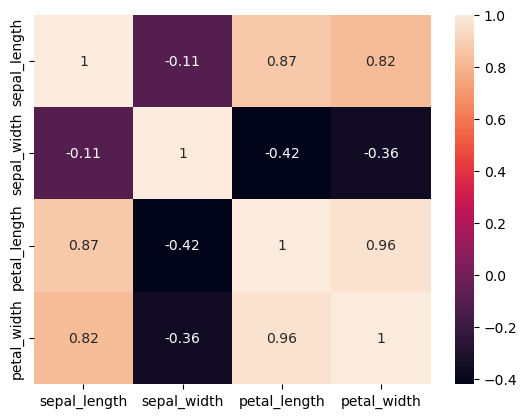

In [7]:
correlation_matrix = df_iris.corr() 

print("Correlation Matrix:")
print(correlation_matrix)
print()

sns.heatmap(df_iris.corr(), annot=True)


Este código Python realiza análisis de regresión lineal y visualización de las dimensiones de los pétalos (largo y ancho) del conjunto de datos de df_iris, desglose del código:

REGRESION LINEAL:
Extraemos la longitud del pétalo (valores x) y el ancho del pétalo (valores y) del DataFrame.
Usamos linregress de scipy para realizar una regresión lineal sobre los datos obtenidos.
Esta función calcula y devuelve lo siguiente:
- Pendiente: El coeficiente de la ecuación lineal (describe la pendiente de la línea).
- Interceptar: La intersección del eje y de la línea de regresión.
- R-cuadrado: El coeficiente de determinación (mide la bondad de ajuste).
- Valor p: La significancia estadística de la relación (los valores p más bajos indican una correlación más fuerte).
- Error estándar: El error estándar de la estimación de la pendiente.
- Imprime los valores calculados.

VISUALIZACION:
Creamos un diagrama de dispersión usando seaborn para visualizar la relación entre la longitud y el ancho de los pétalos.
Utilizamos la pendiente y la intersección obtenidas de la regresión para generar una ecuación lineal de mejor ajuste (slope*x_value_lr+intercept).
Trazamos esta línea de mejor ajuste encima del diagrama de dispersión usando un color rojo y etiquetada como "Regresión lineal".
Agregamos etiquetas y títulos al gráfico para mayor claridad, mostramos de esta forma la visualización combinada.
En general, este código analiza eficazmente la relación lineal entre la longitud y el ancho de los pétalos en el conjunto de datos de Iris. Realiza regresión lineal, calcula estadísticas relevantes y creamos un diagrama de dispersión con la línea de regresión para representar visualmente los hallazgos.



Slope: 0.41641913228540123
Intercept: -0.3665140452167277
R-squared: 0.9269012279220042
P-value: 5.776660988491603e-86
Standard error: 0.009612539319328553


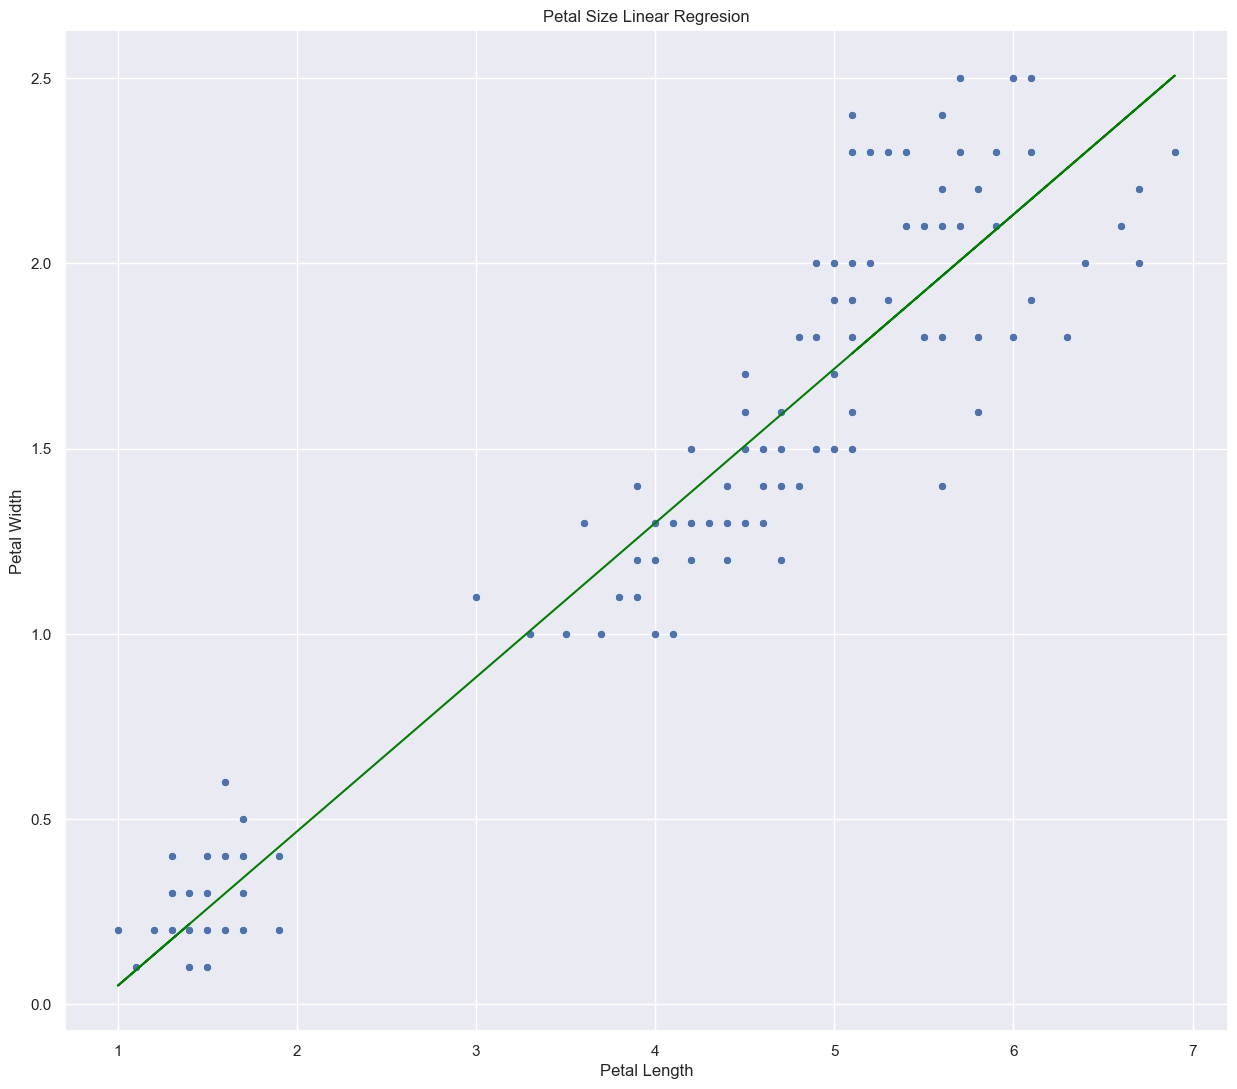

In [23]:
x_value_lr = df_iris['petal_length']
y_value_lr = df_iris['petal_width']

slope, intercept, r_value, p_value, std_err = linregress(x_value_lr, y_value_lr) 

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard error:", std_err)

sns.scatterplot(data=df_iris, x='petal_length', y='petal_width')
plt.plot(x_value_lr, slope*x_value_lr+intercept, color='green', label='Linear Regression') 
plt.title("Petal Size Linear Regresion")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# EJERCICIO 2
### Implementa un jointplot.

Usando previamente las bibliotecas y los datos cargados en memoria sobre el df_iris del ejercicio anterior, procedemos lo siguiente:

VISUALIZACION:
Establecemos el tamaño de la figura para el gráfico usando 'sns.set_theme'.
Se crea una trama conjunta con Seaborn (sns.jointplot),visualizando la relación entre el ancho del sépalo y el largo de los pétalos, mientras definimos por color las especies (paleta colores pastel).
Agregamos título y etiquetas para los ejes x e y.


In [1]:
########################################### FASE 1 ############################################ 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mysql.connector
db = mysql.connector.connect(host='xxxxxx',
                            port='xxxx',
                            database='xxxxxxx',  
                            user='root',
                            password='xxxxxx')

def load_table_to_dataframe(db, cursor, table_name):             # Cargo c/tabla en un Pandas DataFrame.                                                     
    try:
        df = pd.DataFrame()                                      # Creo un DataFrame vacío para la tabla
        cursor.execute(f"SELECT * FROM {table_name}")            # Ejecuto la consulta para extraer tablas
        column_names = [col[0] for col in cursor.description]    # Obtengo los nombres de las columnas
        data = cursor.fetchall()
        data_list = []                                           # Convierto los datos a un formato Dataframe
        for row in data:
            data_list.append(list(row))
        df = pd.DataFrame(data_list, columns=column_names)       # Creo el DataFrame (datos y nombres de columnas)
        return df
    except Exception as e:
        print(f"Error loading table '{table_name}':", e)
        return None

cursor = db.cursor()
cursor.execute("SHOW TABLES")
tables = [tabla[0] for tabla in cursor.fetchall()]
print('-'*55)
print('           >>>> DATAFRAMES ENCONTRADOS <<<<')
print('-'*55)

for table_name in tables:
    df_name = f"df_{table_name.lower()}"  # Convierto el nombre de la tabla a minúsculas con prefijo 'df_'
    df = load_table_to_dataframe(db, cursor, table_name)
    if df is None:
        continue

    globals()[df_name] = df  # Creo una variable global con el nombre dinámico y configuro en el DataFrame
    print(f"DataFrame: {df_name}")  # Imprimo el nombre del DataFrame
    
cursor.close()  # Desconexión
db.close()

-------------------------------------------------------
           >>>> DATAFRAMES ENCONTRADOS <<<<
-------------------------------------------------------
DataFrame: df_card_status
DataFrame: df_companies
DataFrame: df_credit_cards
DataFrame: df_products
DataFrame: df_transactions
DataFrame: df_transactions_products
DataFrame: df_transactions_products_b
DataFrame: df_users
DataFrame: df_vista1


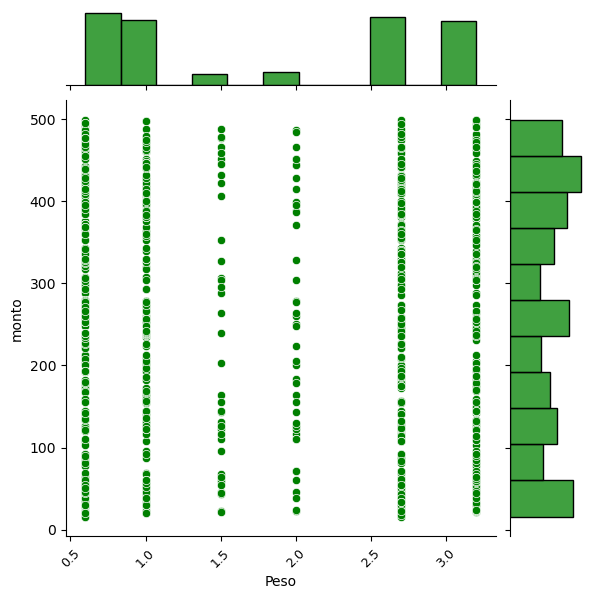

In [9]:
a = pd.merge(df_transactions, df_transactions_products, left_on='id', right_on='id', how='inner')
b = pd.merge(a, df_products, left_on='product_ids_y', right_on='id', how='inner')

sns.jointplot(data=b, x='weight', y='amount', color='g')
plt.xticks(rotation=45, fontsize=9)
plt.xlabel('Peso')
plt.ylabel('monto')
plt.show()

# NIVEL 3
## EJERCICIO 1

### Implementa un violinplot combinado con otro tipo de gráfico.

Usando previamente las bibliotecas y los datos cargados en memoria sobre el df_iris del ejercicio anterior, procedemos lo siguiente:

VISUALIZACION:
Creamos un diagrama de violín seaborn.violinplot para visualizar la distribución de la longitud de los sépalos en diferentes especies de flores.
showmeans=True muestra los valores medios dentro del gráfico del violín. Crea un diagrama de caja usando seaborn.boxplot para mostrar la distribución con cuartiles y posibles valores atípicos, nuevamente con especies en el eje x y longitud de sépalo en el eje y.

PERSONALIZACION:
Establecemos el tamaño de la figura para el gráfico usando sns.set_theme.
Con esta opcion tenemos las posibilidad de girar las etiquetas a conveniencia del eje x (species), 
para mejor legibilidad, aunque este no fue el caso.
Establecemos el tamaño de fuente para las etiquetas de marca del eje x.
Agregamos un título,etiqueta del eje x,y etiqueta del eje y para mayor claridad.
Muestra la visualización generada usando plt.show().

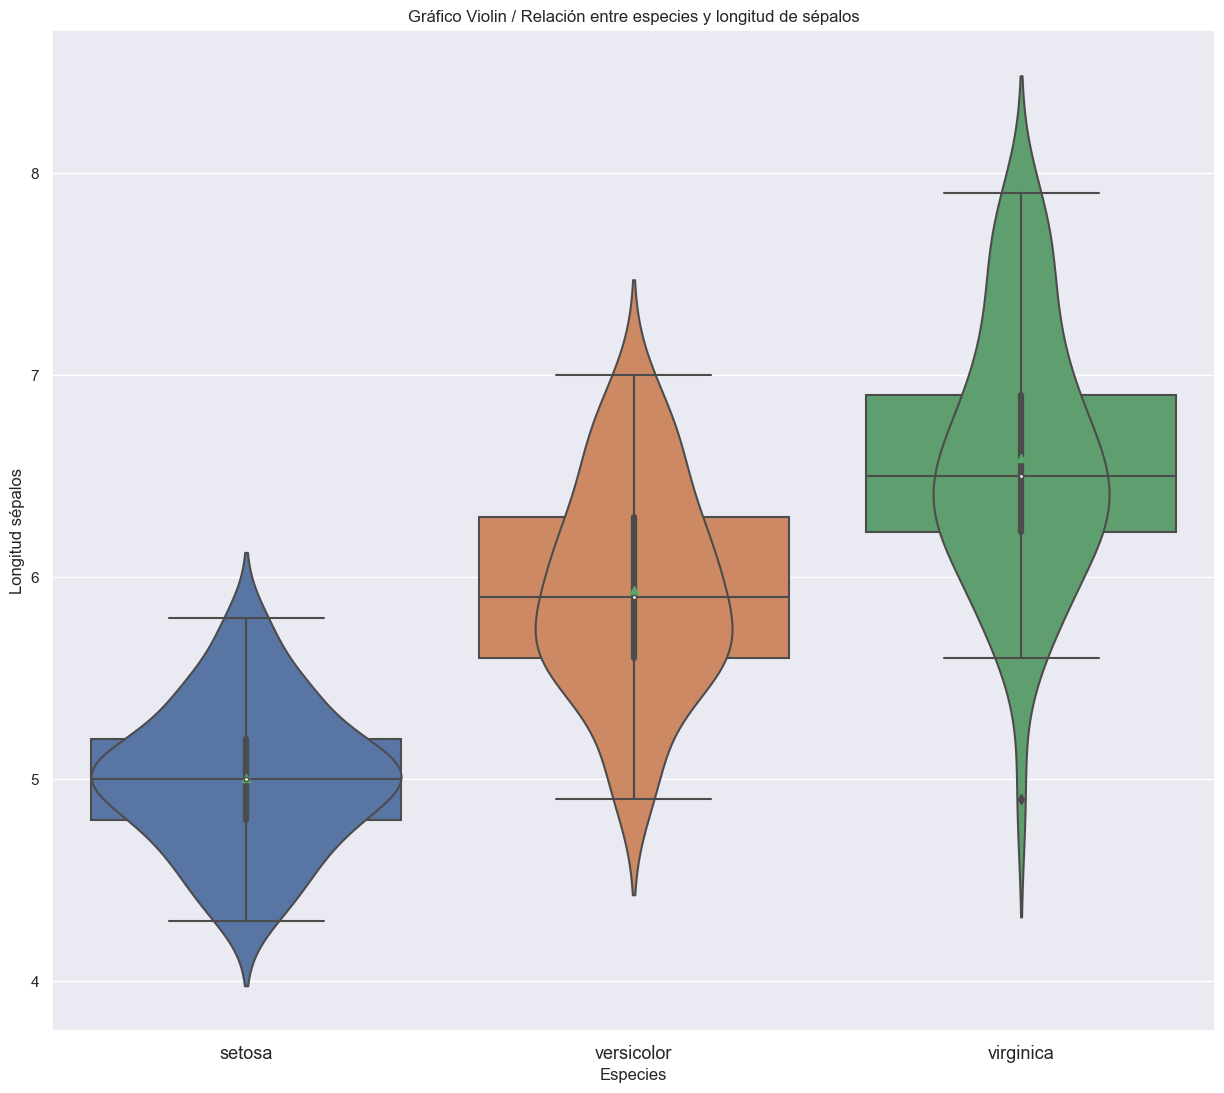

In [20]:
sns.violinplot(data=df_iris, x="species", y="sepal_length", showmeans=True)
sns.boxplot(data=df_iris, x="species", y="sepal_length", showmeans=True)

sns.set_theme(rc={'figure.figsize':(15, 13)})
plt.xticks(rotation=0, fontsize=13)
plt.title("Gráfico Violin / Relación entre especies y longitud de sépalos")
plt.xlabel("Especies")
plt.ylabel("Longitud sépalos")
plt.show()


# Ejercicio 2
### Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

F A S E - 1:
Generamos importacion de bibliotecas, establecemos una nueva conexión a una base de datos MySQL nombrada db_sprint8 y por medio de un funcion de python extramos los datafrfames de interes "df_titanic":
- pandas: Se utiliza para la manipulación de datos y la creación de marcos de datos.
- seaborn: Proporciona visualizaciones estadísticas avanzadas.
- matplotlib.pyplot: Ofrece funcionalidades básicas de trazado.
- numpy: Se utiliza para operaciones numéricas (no se utiliza directamente en este código específico).
- mysql.connector: Permite la conexión a una base de datos MySQL.

F A S E - 2:
Este código Python crea una visualización FacetGrid utilizando seaborn para explorar las relaciones del nuevo dataframe df_titanic, entre la supervivencia de los pasajeros, la clase (Pclass), el sexo y la edad en un conjunto de datos del Titanic.

PERSONALIZACION.
- Creamos de FacetGrid: el código se utiliza sns.FacetGridpara crear una cuadrícula de subtramas basadas en dos variables categóricas: (clase de pasajero) para columnas y (estado de supervivencia) para filas. Dentro de cada subtrama, Pclass Survived diferencia aún más los pasajeros por Sex.

ETIQUETAS Y TITULO:
El grafico se titula "Gráfico:Facet Grid" e incluye etiquetas para PassengerId y Age en los ejes x e y, respectivamente. También se añade una leyenda para diferenciar puntos en función del Sexo. Finalmente, el código muestra la visualización FacetGrid generada.




In [18]:
########################################### FASE 1 ############################################ 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mysql.connector
db = mysql.connector.connect(host='xxxxxx',
                            port='xxxx',
                            database='xxxxxxx',  
                            user='root',
                            password='xxxxxx')

def load_table_to_dataframe(db, cursor, table_name):             # Cargo c/tabla en un Pandas DataFrame.                                                     
    try:
        df = pd.DataFrame()                                      # Creo un DataFrame vacío para la tabla
        cursor.execute(f"SELECT * FROM {table_name}")            # Ejecuto la consulta para extraer tablas
        column_names = [col[0] for col in cursor.description]    # Obtengo los nombres de las columnas
        data = cursor.fetchall()
        data_list = []                                           # Convierto los datos a un formato Dataframe
        for row in data:
            data_list.append(list(row))
        df = pd.DataFrame(data_list, columns=column_names)       # Creo el DataFrame (datos y nombres de columnas)
        return df
    except Exception as e:
        print(f"Error loading table '{table_name}':", e)
        return None

cursor = db.cursor()
cursor.execute("SHOW TABLES")
tables = [tabla[0] for tabla in cursor.fetchall()]
print('-'*55)
print('           >>>> DATAFRAMES ENCONTRADOS <<<<')
print('-'*55)

for table_name in tables:
    df_name = f"df_{table_name.lower()}"  # Convierto el nombre de la tabla a minúsculas con prefijo 'df_'
    df = load_table_to_dataframe(db, cursor, table_name)
    if df is None:
        continue

    globals()[df_name] = df  # Creo una variable global con el nombre dinámico y configuro en el DataFrame
    print(f"DataFrame: {df_name}")  # Imprimo el nombre del DataFrame
    
cursor.close()  # Desconexión
db.close()

-------------------------------------------------------
           >>>> DATAFRAMES ENCONTRADOS <<<<
-------------------------------------------------------
DataFrame: df_iris
DataFrame: df_titanic


<Figure size 1000x600 with 0 Axes>

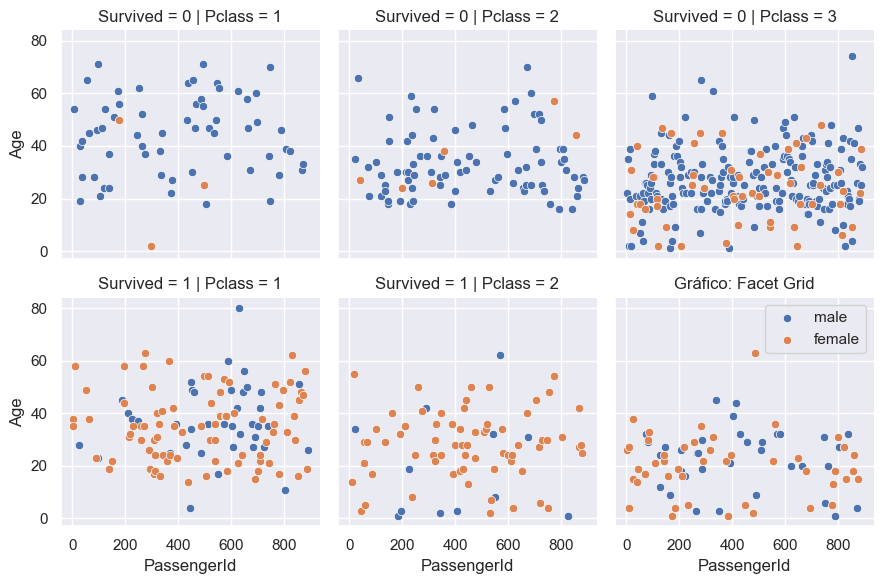

In [19]:
########################################### FASE 2 ############################################ 
plt.figure(figsize=(10, 6))

custom_palette = {'blue': '#43a2ca', 'pink': '#ffb6c1', 'orange': '#feb24c', 'green': '#31a354'}

g = sns.FacetGrid(df_titanic, col="Pclass", row='Survived', hue='Sex')
g.map(sns.scatterplot, "PassengerId", "Age")

plt.title('Gráfico: Facet Grid')
plt.xlabel('PassengerId')
plt.ylabel('Age')
plt.legend()
plt.show()